# IMDB 영화 리뷰 감성 분석

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [4]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 100), (25000, 100), (25000,), (25000,))

In [7]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5)) 
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total para

In [9]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=50, epochs=15, 
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 24s 952us/step - loss: 0.4246 - acc: 0.7930 - val_loss: 0.3282 - val_acc: 0.8546
Epoch 2/15
25000/25000 [==============================] - 23s 919us/step - loss: 0.2885 - acc: 0.8788 - val_loss: 0.3167 - val_acc: 0.8600
Epoch 3/15
25000/25000 [==============================] - 23s 929us/step - loss: 0.2356 - acc: 0.9046 - val_loss: 0.3483 - val_acc: 0.8498
Epoch 4/15
25000/25000 [==============================] - 23s 926us/step - loss: 0.1994 - acc: 0.9229 - val_loss: 0.3587 - val_acc: 0.8564
Epoch 5/15
25000/25000 [==============================] - 23s 928us/step - loss: 0.1610 - acc: 0.9403 - val_loss: 0.3976 - val_acc: 0.8508
Epoch 6/15
25000/25000 [==============================] - 23s 930us/step - loss: 0.1344 - acc: 0.9515 - val_loss: 0.4263 - val_acc: 0.8480
Epoch 7/15
25000/25000 [==============================] - 23s 938us/step - loss: 0.1065 - acc: 0.9609 - val_loss: 0.

In [11]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 4s 151us/step

 Test Accuracy: 0.8416


In [12]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

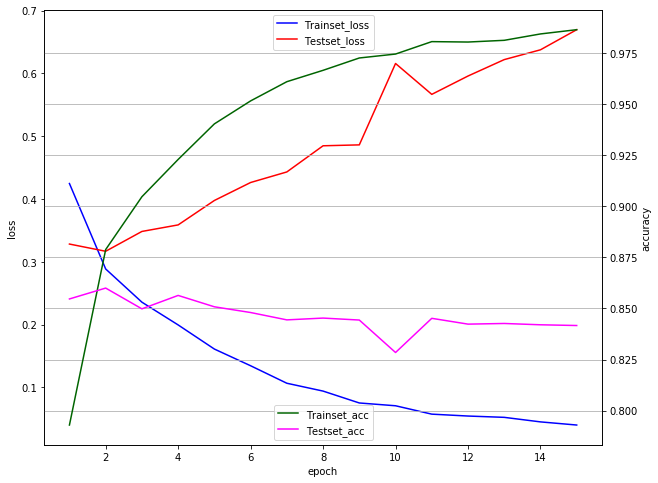

In [13]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.grid()
plt.show()